In [14]:
# API Refference: https://partner.steamgames.com/doc/webapi/ISteamUserStats

import json
import urllib
import requests
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def get_api_link(interface: str, method: str, version: str, **kwargs):
    url = f'https://api.steampowered.com/{interface}/{method}/v000{version}'
    if kwargs:
        url += '/?'
        for key in kwargs:
            url += str(key) + '=' + str(kwargs[key]) + '&'
    return url

def get_ordered_numbers(r: dict, search_term: str, ignore_terms: list = None, high_to_low: bool = True, truncate_name: bool = True):
    item_dict = {}

    for item in r['playerstats']['stats']:
        if search_term in item['name']:
            if ignore_terms:
                res = any(ele in item['name'] for ele in ignore_terms)
                if not res:
                    if truncate_name:
                        item_dict[item['name'].split('_')[-1]] = int(item['value'])
                    else:
                        item_dict[item['name']] = int(item['value'])
            else:
                if truncate_name:
                    item_dict[item['name'].split('_')[-1]] = int(item['value'])
                else:
                    item_dict[item['name']] = int(item['value'])

    items_ordered = {k: v for k, v in sorted(item_dict.items(), key=lambda item: item[1], reverse=high_to_low)}
    item_list = items_ordered.items()
    name, number = zip(*item_list)

    return name, number, items_ordered

In [7]:
steamid = '76561198020908104'
key = 'AA1A1F692E6D48BFC0F23FB2F7313A2B'

link = get_api_link('ISteamUser', 'GetPlayerSummaries', '2', key=key, steamids=steamid, appid='730')
print(link)
r = requests.get(link).json()

r['response']['players']

https://api.steampowered.com/ISteamUser/GetPlayerSummaries/v0002/?key=AA1A1F692E6D48BFC0F23FB2F7313A2B&steamids=76561198020908104&appid=730&


[{'steamid': '76561198020908104',
  'communityvisibilitystate': 3,
  'profilestate': 1,
  'personaname': 'Fullbuster',
  'profileurl': 'https://steamcommunity.com/profiles/76561198020908104/',
  'avatar': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/28/28bf3bd016c1ec2169e106a6e6ba1d90ccfe3287.jpg',
  'avatarmedium': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/28/28bf3bd016c1ec2169e106a6e6ba1d90ccfe3287_medium.jpg',
  'avatarfull': 'https://steamcdn-a.akamaihd.net/steamcommunity/public/images/avatars/28/28bf3bd016c1ec2169e106a6e6ba1d90ccfe3287_full.jpg',
  'avatarhash': '28bf3bd016c1ec2169e106a6e6ba1d90ccfe3287',
  'lastlogoff': 1619687102,
  'personastate': 0,
  'realname': 'Alex Fullbuster',
  'primaryclanid': '103582791429521408',
  'timecreated': 1265553224,
  'personastateflags': 0}]

Fullbuster
Alex Fullbuster


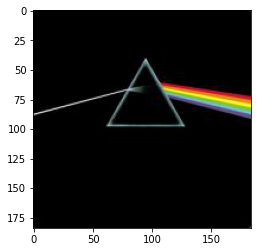

In [17]:
print(r['response']['players'][0]['personaname'])
print(r['response']['players'][0]['realname'])
img = urllib.request.urlopen(r['response']['players'][0]['avatarfull'])
a = plt.imread(img, format='jpg')
plt.imshow(a)
plt.show()